In [1]:
import sqlite3
import os

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# 10 последних добавленных файлов
cursor.execute( "SELECT file.path, name, file_size, codec, duration FROM file JOIN video_stream ON (file.path=video_stream.path AND file.name=video_stream.file) WHERE position=0 ORDER BY file.time DESC, name DESC LIMIT 10" )
for path, file, size, codec, duration in cursor.fetchall() :
    print( f"{os.path.join(path,file)} {size} {codec} {duration}" )
conn.close()


C:\Users\yaann\Documents\kursovaya\videos\папка 3\IMG_7960.MP4 5904141 h264 44.0
C:\Users\yaann\Documents\kursovaya\videos\папка 3\IMG_7952.MP4 1472798 h264 13.0
C:\Users\yaann\Documents\kursovaya\videos\Рисунки по клеточкам.mp4 5525573 h264 15.0
C:\Users\yaann\Documents\kursovaya\videos\IMG_7126.MP4 4167015 h264 33.0
C:\Users\yaann\Documents\kursovaya\videos\CPDML_OpenCall_480p.mp4 17820139 h264 59.0


In [2]:
import sqlite3
import os

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# ТОП 10 самых больших файлов
cursor.execute( "SELECT file.path, name, file_size, codec, duration FROM file JOIN video_stream ON (file.path=video_stream.path AND file.name=video_stream.file) WHERE position=0 ORDER BY file_size DESC, name LIMIT 10" )
for path, file, size, codec, duration in cursor.fetchall() :
    print( f"{os.path.join(path,file)} {size} {codec} {duration}" )

C:\Users\yaann\Documents\kursovaya\videos\CPDML_OpenCall_480p.mp4 17820139 h264 59.0
C:\Users\yaann\Documents\kursovaya\videos\папка 3\IMG_7960.MP4 5904141 h264 44.0
C:\Users\yaann\Documents\kursovaya\videos\Рисунки по клеточкам.mp4 5525573 h264 15.0
C:\Users\yaann\Documents\kursovaya\videos\IMG_7126.MP4 4167015 h264 33.0
C:\Users\yaann\Documents\kursovaya\videos\папка 3\IMG_7952.MP4 1472798 h264 13.0


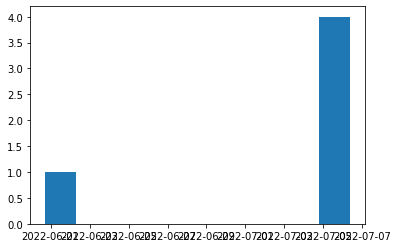

In [3]:
from matplotlib import pyplot
import sqlite3, datetime

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма времени создания файлов
cursor.execute( "SELECT mtime FROM file ORDER BY mtime DESC, name" )
data = [ datetime.datetime.fromtimestamp(e) for (e,) in cursor.fetchall() ]
pyplot.hist(data)
pyplot.show()

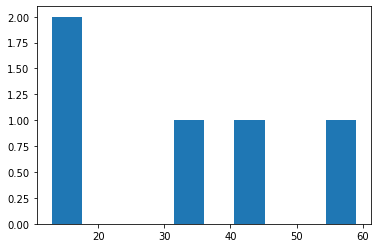

In [4]:
from matplotlib import pyplot
import sqlite3

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма длительности
cursor.execute( "SELECT duration FROM file JOIN video_stream ON (file.path=video_stream.path AND file.name=video_stream.file) WHERE position=0" )
data = [ e for (e,) in cursor.fetchall() ]
pyplot.hist(data)
pyplot.show()

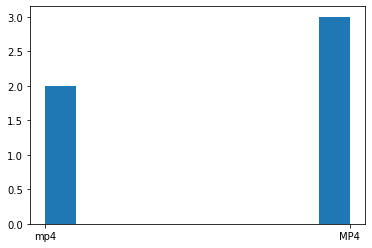

In [5]:
from matplotlib import pyplot
import sqlite3, os

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма типов файлов
cursor.execute( "SELECT name FROM file" )
data = [ os.path.splitext(e)[1][1:] for (e,) in cursor.fetchall() ]
pyplot.hist(data)
pyplot.show()

[('MP4', 3.669724146525065), ('mp4', 11.132102966308594)]


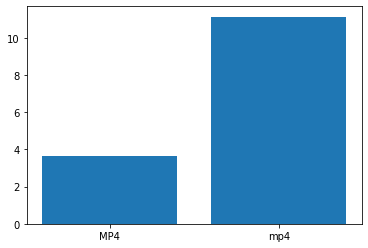

In [6]:
from matplotlib import pyplot
import sqlite3, os, statistics

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма размера файла по типам
cursor.execute( "SELECT name, file_size FROM file" )
data = [ (os.path.splitext(name)[1][1:], size) for name, size in cursor.fetchall() ]
data = [ (x, statistics.mean( [y[1] / 1024 / 1024 for y in data if y[0]==x] )) for x in set(map(lambda x:x[0], data)) ]
print(data)
pyplot.bar( [ e[0] for e in data ], [ e[1] for e in data ] )
pyplot.show()

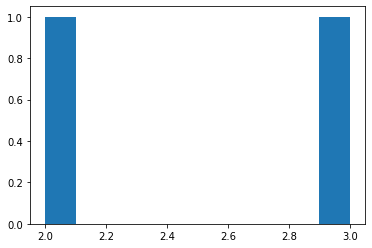

In [7]:
from matplotlib import pyplot
import sqlite3, os, statistics

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма количества файлов в папках
cursor.execute( "SELECT count(*) FROM file GROUP BY path" )
data = [ e for (e,) in cursor.fetchall() ]
pyplot.hist( data )
pyplot.show()

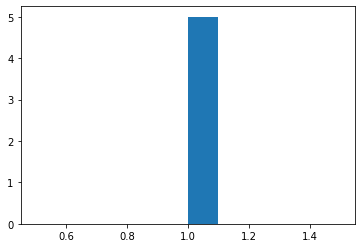

In [8]:
from matplotlib import pyplot
import sqlite3, os, statistics

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма количества аудиодорожек в файлах
cursor.execute( "SELECT count(*) FROM audio_stream GROUP BY path, file" )
data = [ e for (e,) in cursor.fetchall() ]
pyplot.hist( data )
pyplot.show()

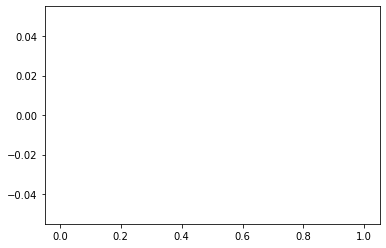

In [9]:
from matplotlib import pyplot
import sqlite3, os, statistics

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Гистограмма количества субтитров в файлах
cursor.execute( "SELECT count(*) FROM subtitle_stream GROUP BY path, file" )
data = [ e for (e,) in cursor.fetchall() ]
pyplot.hist( data )
pyplot.show()

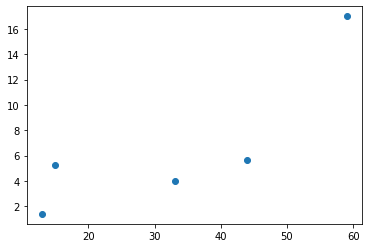

In [10]:
from matplotlib import pyplot
import sqlite3, os, statistics

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Зависимость размера файла от длительности
cursor.execute( "SELECT duration, file_size FROM file JOIN video_stream ON (file.path=video_stream.path AND file.name=video_stream.file) WHERE position=0" )
data = cursor.fetchall()
pyplot.scatter( [ x for x,y in data ], [ y/1024/1024 for x,y in data ] )
pyplot.show()

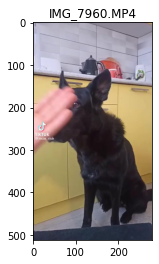

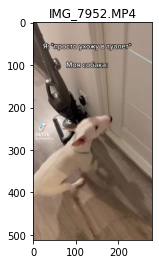

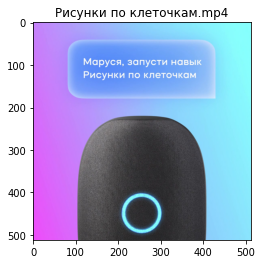

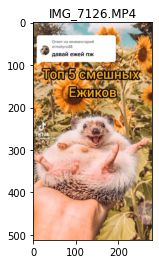

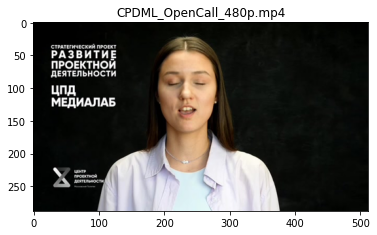

In [11]:
import matplotlib.image as mpimg
from matplotlib import pyplot
import sqlite3, io

conn = sqlite3.connect("moviedb.sqlite3")
cursor = conn.cursor()

# Скрины последних 10 добавленных файлов
cursor.execute( "SELECT name, data FROM file JOIN video_stream ON (file.path=video_stream.path AND file.name=video_stream.file) JOIN thumb ON (video_stream.path=thumb.path AND video_stream.file=thumb.file AND video_stream.position=thumb.stream) WHERE video_stream.position=0 AND thumb.position=(SELECT position FROM thumb WHERE file=video_stream.file LIMIT 1) ORDER BY time DESC, thumb.position, thumb.stream LIMIT 10" )
for i, (name, data,) in zip(range(10), cursor.fetchall()) :
    img = pyplot.imread( io.BytesIO( data ) )
    pyplot.figure(i)
    pyplot.imshow(img)
    pyplot.title(name)